In [1]:
# coding: utf-8
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'sans-serif'
import pandas as pd
import numpy as np
import multiprocessing
import joblib
from pandas.core.indexes.datetimes import date_range
from time import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.multioutput import MultiOutputRegressor
import xgboost as xgboost

In [2]:
data2 = pd.read_csv("./한국남부발전(주)_신인천소내 태양광발전실적_20200820.csv",encoding='CP949',index_col=0,parse_dates=True)
data2 = data2.loc[:'2019']
preprocessed_data2 = data2[['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24']]
preprocessed_data2.columns = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24']
preprocessed_redata2 = preprocessed_data2[['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24']]
preprocessed_redata2 = preprocessed_redata2.reindex(pd.date_range(start='2013-01-01', end='2019-12-31'), fill_value=0)
preprocessed_redata2.loc['2016-05-04'] = preprocessed_redata2.loc['2016-05-03'].values
preprocessed_redata2.loc['2016-06-01'] = preprocessed_redata2.loc['2016-06-02'].values

data3 = pd.read_csv("./한국남부발전(주)_부산복합자재창고 태양광발전실적_20200924.csv",encoding='CP949',index_col=0,parse_dates=True)
data3_1 = data3[data3['호기'] == 1]
data3_1 = data3_1.loc[:'2019']
preprocessed_data3_1 = data3_1[['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24']]
preprocessed_data3_1.columns = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24']
preprocessed_redata3_1 = preprocessed_data3_1[['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24']]

data4 = pd.read_csv("./한국남부발전(주)_부산신항 태양광발전실적_20200820.csv",encoding='CP949',index_col=0,parse_dates=True)
data4 = data4.loc[:'2019']
preprocessed_data4 = data4[['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24']]
preprocessed_data4.columns = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24']
preprocessed_redata4 = preprocessed_data4[['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24']]

preprocessed_redata2_flat = preprocessed_redata2.stack(dropna=False)
preprocessed_redata3_1_flat = preprocessed_redata3_1.stack(dropna=False)
preprocessed_redata4_flat = preprocessed_redata4.stack(dropna=False)

index_date =pd.date_range(start='2013-01-01 00:00:00', end='2020-01-01 00:00:00', closed='right', freq='H', tz='Asia/Seoul')

# len(index_date)

df_pre2 = pd.DataFrame(data=preprocessed_redata2_flat.values, index=index_date)
df_pre3_1 = pd.DataFrame(data=preprocessed_redata3_1_flat.values, index=index_date)
df_pre4 = pd.DataFrame(data=preprocessed_redata4_flat.values, index=index_date)


df_full = pd.concat([df_pre2, df_pre3_1, df_pre4], axis=1)

generations_data = df_full
generations_data = pd.DataFrame(index=pd.date_range(start='2013-01-01 00:00:00', end='2020-01-01 00:00:00', closed='right', freq='H', tz='Asia/Seoul'), data=df_full.values)
generations_data.columns = ['발전량(신인천소내)', '발전량(부산복합자재창고)', '발전량(부산신항)']
generations_data = generations_data.fillna(0)
selected_gens = generations_data
selected_gens

,발전량(신인천소내),발전량(부산복합자재창고),발전량(부산신항)
2013-01-01 01:00:00+09:00,0.0,0.0,0.0
2013-01-01 02:00:00+09:00,0.0,0.0,0.0
2013-01-01 03:00:00+09:00,0.0,0.0,0.0
2013-01-01 04:00:00+09:00,0.0,0.0,0.0
2013-01-01 05:00:00+09:00,0.0,0.0,0.0
...,...,...,...
2019-12-31 20:00:00+09:00,0.0,0.0,0.0
2019-12-31 21:00:00+09:00,0.0,0.0,0.0
2019-12-31 22:00:00+09:00,0.0,0.0,0.0
2019-12-31 23:00:00+09:00,0.0,0.0,0.0


In [3]:
weather_data_2 = pd.read_csv('37.4772_126.6249_Solcast_PT60M.csv', parse_dates=True, index_col='PeriodEnd')
weather_data_3 = pd.read_csv('35.10468_129.0323_Solcast_PT60M.csv', parse_dates=True, index_col='PeriodEnd')
weather_data_4 = pd.read_csv('35.10468_129.0323_Solcast_PT60M.csv', parse_dates=True, index_col='PeriodEnd')
weather_data_full = pd.concat([weather_data_2, weather_data_3, weather_data_4], axis=1)
weather_data_full

,PeriodStart,Period,AirTemp,Azimuth,CloudOpacity,DewpointTemp,Dhi,Dni,Ebh,Ghi,...,GtiFixedTilt,GtiTracking,PrecipitableWater,RelativeHumidity,SnowWater,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith,AlbedoDaily
PeriodEnd,,,,,,,,,,,,,,,,,,,,,
2012-12-31 02:00:00+00:00,2012-12-31T01:00:00Z,PT60M,-8.6,-149,9.1,-14.9,155,513,197,352,...,762,614,2.8,55.7,0.2,1010.4,307,8.0,65,0.14
2012-12-31 03:00:00+00:00,2012-12-31T02:00:00Z,PT60M,-7.3,-163,6.1,-14.3,156,647,296,453,...,890,592,2.9,56.4,0.2,1010.6,304,8.0,60,0.14
2012-12-31 04:00:00+00:00,2012-12-31T03:00:00Z,PT60M,-6.4,-178,5.3,-13.7,165,665,322,487,...,933,578,3.2,56.6,0.2,1010.5,302,8.0,59,0.14
2012-12-31 05:00:00+00:00,2012-12-31T04:00:00Z,PT60M,-5.7,166,6.7,-13.1,166,617,290,456,...,883,597,3.7,56.2,0.2,1010.4,298,7.9,61,0.14
2012-12-31 06:00:00+00:00,2012-12-31T05:00:00Z,PT60M,-5.2,152,24.3,-12.4,234,166,71,306,...,748,616,4.1,55.9,0.2,1010.2,295,7.9,66,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-01 18:00:00+00:00,2021-01-01T17:00:00Z,PT60M,-3.5,-67,25.1,-11.6,0,0,0,0,...,0,0,5.3,60.9,0.0,1016.6,294,2.9,151,0.15
2021-01-01 19:00:00+00:00,2021-01-01T18:00:00Z,PT60M,-3.8,-81,16.6,-12.4,0,0,0,0,...,0,0,5.5,62.1,0.0,1016.7,304,2.5,138,0.15
2021-01-01 20:00:00+00:00,2021-01-01T19:00:00Z,PT60M,-4.1,-91,21.4,-13.9,0,0,0,0,...,0,0,5.6,63.2,0.0,1017.0,312,2.7,126,0.15


In [4]:
X = weather_data_full.drop(columns=['DewpointTemp','WindSpeed10m','WindDirection10m', 'RelativeHumidity','PrecipitableWater','SnowWater','SurfacePressure', 'GtiFixedTilt','GtiTracking', 'AlbedoDaily'])
y = selected_gens
X, y

(                                    PeriodStart Period  AirTemp  Azimuth  \
 PeriodEnd                                                                  
 2012-12-31 02:00:00+00:00  2012-12-31T01:00:00Z  PT60M     -8.6     -149   
 2012-12-31 03:00:00+00:00  2012-12-31T02:00:00Z  PT60M     -7.3     -163   
 2012-12-31 04:00:00+00:00  2012-12-31T03:00:00Z  PT60M     -6.4     -178   
 2012-12-31 05:00:00+00:00  2012-12-31T04:00:00Z  PT60M     -5.7      166   
 2012-12-31 06:00:00+00:00  2012-12-31T05:00:00Z  PT60M     -5.2      152   
 ...                                         ...    ...      ...      ...   
 2021-01-01 18:00:00+00:00  2021-01-01T17:00:00Z  PT60M     -3.5      -67   
 2021-01-01 19:00:00+00:00  2021-01-01T18:00:00Z  PT60M     -3.8      -81   
 2021-01-01 20:00:00+00:00  2021-01-01T19:00:00Z  PT60M     -4.1      -91   
 2021-01-01 21:00:00+00:00  2021-01-01T20:00:00Z  PT60M     -4.3     -100   
 2021-01-01 22:00:00+00:00  2021-01-01T21:00:00Z  PT60M     -4.5     -108   

In [5]:
X_new = X
X_new.index = X.index.tz_convert(tz='Asia/Seoul') # forecast
X_new = X_new.drop(['PeriodStart', 'Period'], axis=1) # forecast
X_new = X_new[(X_new.index.year > 2012) & (X_new.index.year < 2020)]
y_new = y
X_new.shape, y_new.shape

((61344, 24), (61344, 3))

In [6]:
y_new.index

DatetimeIndex(['2013-01-01 01:00:00+09:00', '2013-01-01 02:00:00+09:00',
               '2013-01-01 03:00:00+09:00', '2013-01-01 04:00:00+09:00',
               '2013-01-01 05:00:00+09:00', '2013-01-01 06:00:00+09:00',
               '2013-01-01 07:00:00+09:00', '2013-01-01 08:00:00+09:00',
               '2013-01-01 09:00:00+09:00', '2013-01-01 10:00:00+09:00',
               ...
               '2019-12-31 15:00:00+09:00', '2019-12-31 16:00:00+09:00',
               '2019-12-31 17:00:00+09:00', '2019-12-31 18:00:00+09:00',
               '2019-12-31 19:00:00+09:00', '2019-12-31 20:00:00+09:00',
               '2019-12-31 21:00:00+09:00', '2019-12-31 22:00:00+09:00',
               '2019-12-31 23:00:00+09:00', '2020-01-01 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', length=61344, freq='H')

In [7]:
X_new['month'] = X_new.index.month
X_new['day'] = X_new.index.day
X_new['hour'] = X_new.index.hour
X_new['dayofyear'] = X_new.index.dayofyear
X_new.loc['2016-03':'2016-12']['dayofyear'] =  X_new.loc['2016-03':'2016-12']['dayofyear'] - 1
dropThis2016 = pd.date_range(start='2016-02-29 00:00:00+09:00', end='2016-02-29 23:00+09:00', freq='H')
X_renew = X_new.drop(dropThis2016)
y_renew = y_new.drop(dropThis2016)
X_selected = X_renew
y_selected = y_renew
X_selected, y_selected

/Users/itd/opt/anaconda3/envs/fbprophet/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


(                           AirTemp  Azimuth  CloudOpacity  Dhi  Dni  Ebh  Ghi  \
 PeriodEnd                                                                       
 2013-01-01 00:00:00+09:00     -8.0       47           0.0    0    0    0    0   
 2013-01-01 01:00:00+09:00     -8.6        4           0.0    0    0    0    0   
 2013-01-01 02:00:00+09:00     -9.4      -40           0.0    0    0    0    0   
 2013-01-01 03:00:00+09:00    -10.1      -66           0.9    0    0    0    0   
 2013-01-01 04:00:00+09:00     -9.8      -81          12.0    0    0    0    0   
 ...                            ...      ...           ...  ...  ...  ...  ...   
 2019-12-31 19:00:00+09:00     -3.9      110           0.0    0    0    0    0   
 2019-12-31 20:00:00+09:00     -4.0      101           0.0    0    0    0    0   
 2019-12-31 21:00:00+09:00     -4.0       93           0.0    0    0    0    0   
 2019-12-31 22:00:00+09:00     -3.7       84           0.0    0    0    0    0   
 2019-12-31 23:0

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_selected, test_size=0.14285714285714285714, shuffle=False)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((52560, 28), (8760, 28), (52560, 3), (8760, 3))

In [9]:
X_train = np.ascontiguousarray(X_train)
y_train = np.ascontiguousarray(y_train)

In [10]:
multi_xgb = MultiOutputRegressor(xgboost.XGBRegressor(n_jobs = multiprocessing.cpu_count(),n_estimators = 400, max_depth = 4, learning_rate = 0.1))
fit_result = multi_xgb.fit(X_train, y_train)

/Users/itd/opt/anaconda3/envs/fbprophet/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [11]:
y_pred_multixgb = multi_xgb.fit(X_train, y_train).predict(X_test).reshape(-1,3)
df_y_pred_multixgb = pd.DataFrame(data=y_pred_multixgb, index=y_test.index, columns=y_test.columns)
error_xgb = y_test - df_y_pred_multixgb
abserror_xgb = abs(error_xgb)

/Users/itd/opt/anaconda3/envs/fbprophet/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/Users/itd/opt/anaconda3/envs/fbprophet/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [12]:
print(np.mean(abserror_xgb['발전량(신인천소내)']))
print(np.mean(abserror_xgb['발전량(부산복합자재창고)']))
print(np.mean(abserror_xgb['발전량(부산신항)']))

6.824681728593769
6.0812725618287
2.886628692404463


In [13]:
joblib.dump(fit_result, "xgboost.pickle")

['xgboost.pickle']

In [22]:
load = joblib.load('xgboost.pickle')
load.estimator

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=None, max_depth=4,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=400, n_jobs=6, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)

In [14]:
df_y_pred_multixgb

,발전량(신인천소내),발전량(부산복합자재창고),발전량(부산신항)
2019-01-01 01:00:00+09:00,-0.282235,-0.183313,-0.155299
2019-01-01 02:00:00+09:00,-0.360134,-0.183313,-0.155299
2019-01-01 03:00:00+09:00,-0.389113,-0.075072,-0.159301
2019-01-01 04:00:00+09:00,-0.100613,0.340250,0.041609
2019-01-01 05:00:00+09:00,-0.037301,-0.055593,0.027788
...,...,...,...
2019-12-31 20:00:00+09:00,-0.029939,-0.033466,-0.124533
2019-12-31 21:00:00+09:00,-0.029939,-0.070426,-0.124533
2019-12-31 22:00:00+09:00,-0.039621,-0.004515,-0.134552
2019-12-31 23:00:00+09:00,-0.039621,-0.004515,-0.051057


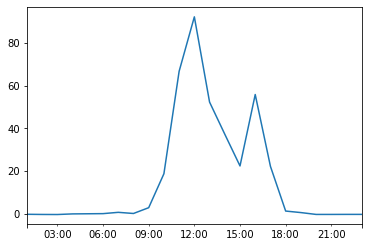

In [16]:
df_y_pred_multixgb['발전량(신인천소내)'].loc['2019-01-01'].plot()